In [185]:
import time
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix, balanced_accuracy_score, confusion_matrix,roc_curve,auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import pipeline, compose, impute
from sklearn.decomposition import PCA

In [186]:
df = pd.read_table("./data/sample_data CRM2.CSV", delimiter=';')
df


,customer_id,reporting_date,default_moment,intodefault,mrating,PD
0,1,31.01.2010,30.09.2010,1,21,0.20
1,1,28.02.2010,30.09.2010,1,22,0.25
2,1,31.03.2010,30.09.2010,1,22,0.25
3,1,30.04.2010,30.09.2010,1,22,0.25
4,1,31.05.2010,30.09.2010,1,22,0.25
...,...,...,...,...,...,...
41674,2501,31.07.2011,NaN,0,17,0.06
41675,2501,31.08.2011,NaN,0,17,0.06
41676,2501,30.09.2011,NaN,0,17,0.06
41677,2501,31.10.2011,NaN,0,17,0.06


In [187]:
df.isnull().sum()

customer_id           0
reporting_date        0
default_moment    31761
intodefault           0
mrating               0
PD                    0
dtype: int64

In [188]:
df['intodefault'].value_counts()

0    32576
1     9103
Name: intodefault, dtype: int64

In [189]:
df_majority = df[df.intodefault==0]
df_minority = df[df.intodefault==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=29905,    # to match majority class
                                 random_state=123) # reproducible results
 

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.intodefault.value_counts()

0    32576
1    29905
Name: intodefault, dtype: int64

In [190]:
X, y = df_upsampled[['mrating', 'PD']], df_upsampled['intodefault']

In [191]:
y.value_counts()

0    32576
1    29905
Name: intodefault, dtype: int64

In [192]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)

In [193]:
print(x_train.shape)
print(x_test.shape)

(49984, 2)
(12497, 2)


In [194]:
classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees":   ExtraTreesClassifier(n_estimators=100),
  "Random Forest": RandomForestClassifier(n_estimators=100),
  "AdaBoost":      AdaBoostClassifier(n_estimators=100),
  "Skl GBM":       GradientBoostingClassifier(n_estimators=100),
  "Skl HistGBM":   HistGradientBoostingClassifier(max_iter=100),
  "XGBoost":       XGBClassifier(n_estimators=100),
  "LightGBM":      LGBMClassifier(n_estimators=100),
  "CatBoost":      CatBoostClassifier(n_estimators=100),
  "Log_reg":       LogisticRegression()
}

In [195]:
Models = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='mean')),
])

In [196]:
tree_classifiers = {name: pipeline.make_pipeline(Models, model) for name, model in classifiers.items()}

In [197]:
results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

In [198]:
for model_name, model in classifiers.items():

    start_time = time.time()
    model.fit(x_train, y_train)
    total_time = time.time() - start_time
        
    pred = model.predict(x_test)
    
    results = results.append({"Model":    model_name,
                              "Accuracy": accuracy_score(y_test, pred)*100,
                              "Bal Acc.": balanced_accuracy_score(y_test, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)

results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
print(results_ord)

C:\Users\asus\AppData\Local\Temp\ipykernel_16188\3961301191.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\asus\AppData\Local\Temp\ipykernel_16188\3961301191.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\asus\AppData\Local\Temp\ipykernel_16188\3961301191.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\asus\AppData\Local\Temp\ipykernel_16188\3961301191.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_na

[23:40:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\asus\AppData\Local\Temp\ipykernel_16188\3961301191.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\asus\AppData\Local\Temp\ipykernel_16188\3961301191.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,


Learning rate set to 0.452204
0:	learn: 0.6443012	total: 13.8ms	remaining: 1.36s
1:	learn: 0.6277859	total: 26.9ms	remaining: 1.32s
2:	learn: 0.6215021	total: 40.2ms	remaining: 1.3s
3:	learn: 0.6195736	total: 52.4ms	remaining: 1.26s
4:	learn: 0.6186803	total: 67.6ms	remaining: 1.28s
5:	learn: 0.6183996	total: 82.2ms	remaining: 1.29s
6:	learn: 0.6182994	total: 92.6ms	remaining: 1.23s
7:	learn: 0.6181730	total: 107ms	remaining: 1.24s
8:	learn: 0.6181418	total: 122ms	remaining: 1.24s
9:	learn: 0.6181242	total: 139ms	remaining: 1.25s
10:	learn: 0.6181067	total: 155ms	remaining: 1.25s
11:	learn: 0.6181009	total: 171ms	remaining: 1.25s
12:	learn: 0.6180982	total: 185ms	remaining: 1.24s
13:	learn: 0.6180970	total: 198ms	remaining: 1.22s
14:	learn: 0.6180916	total: 217ms	remaining: 1.23s
15:	learn: 0.6180913	total: 230ms	remaining: 1.21s
16:	learn: 0.6180912	total: 239ms	remaining: 1.17s
17:	learn: 0.6180892	total: 252ms	remaining: 1.15s
18:	learn: 0.6180892	total: 265ms	remaining: 1.13s
19:	l

C:\Users\asus\AppData\Local\Temp\ipykernel_16188\3961301191.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,


            Model   Accuracy   Bal Acc.      Time
1   Decision Tree  66.351924  66.399428  0.049955
2     Extra Trees  66.351924  66.399428  2.472003
3   Random Forest  66.351924  66.399428  3.088439
4        AdaBoost  66.351924  66.399428  3.842997
5         Skl GBM  66.351924  66.399428  3.874001
6     Skl HistGBM  66.351924  66.399428  1.183005
7         XGBoost  66.351924  66.399428  1.007999
8        LightGBM  66.351924  66.399428  0.605996
9        CatBoost  66.351924  66.399428  1.775040
10        Log_reg  66.255901  65.866868  0.224005


C:\Users\asus\AppData\Local\Temp\ipykernel_16188\3961301191.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,


In [199]:
clf_tree = DecisionTreeClassifier()
clf_log = LogisticRegression()

In [200]:
clf_tree.fit(x_train, y_train)
clf_log.fit(x_train, y_train)

LogisticRegression()

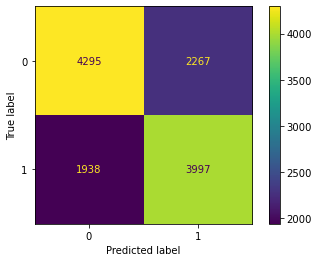

In [216]:
plot_confusion_matrix(clf_tree, x_test, y_test)
plt.savefig('confusion_matrix.png')
plt.show()

In [213]:
score1 = clf_tree.predict_proba(x_test)[:,1]
score2 = clf_log.predict_proba(x_test)[:,1]
score1

array([0.7857868 , 0.7857868 , 0.27188292, ..., 0.50554638, 0.2780763 ,
       0.2780763 ])

In [202]:
fpr1, tpr1, threshold1 = roc_curve(y_test, score1)
fpr2, tpr2, threshold2 = roc_curve(y_test, score2)

In [205]:
print('AUC value for DecisionTree: ', roc_auc_score(y_test, score1))
print('AUC value for Logistic Regression: ', roc_auc_score(y_test, score2))

AUC value for DecisionTree:  0.7059362102960884
AUC value for Logistic Regression:  0.7054389509229186


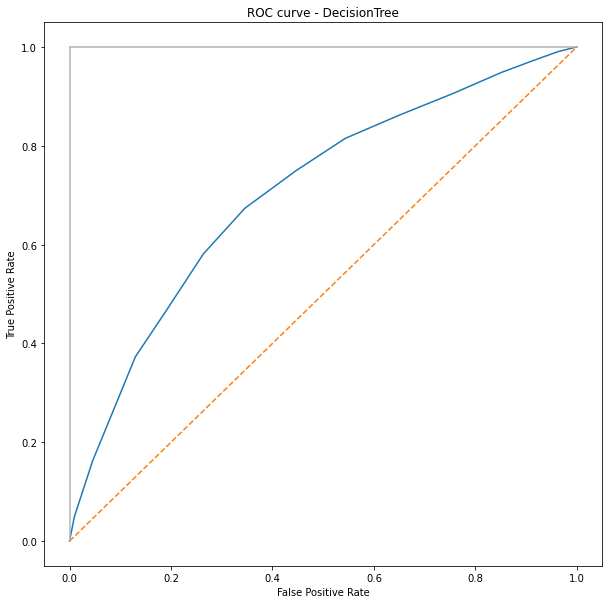

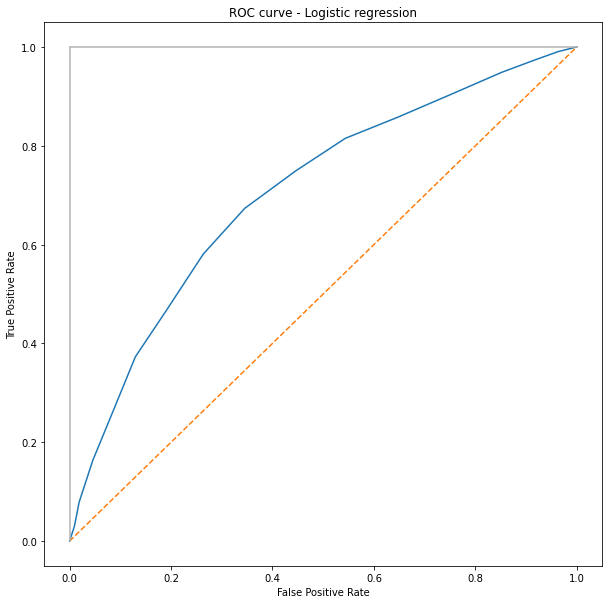

In [209]:
plt.subplots(1, figsize=(10,10))
plt.title('ROC curve - DecisionTree')
plt.plot(fpr1, tpr1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.savefig('ROC_fig1.png')
plt.show()
plt.subplots(1, figsize=(10,10))
plt.title('ROC curve - Logistic regression')
plt.plot(fpr2, tpr2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.savefig('ROC_fig2.png')
plt.show()